#### Mandelbrot set using logistic map

- zn+1 = r*zn(1 − zn), z0 = 0.5
- wn+1 = r*wn(1 − wn), w0 = 0.5 + epsilon
- epsilon = 10−8

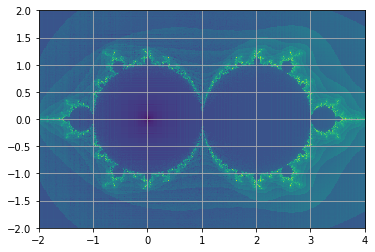

Time:  5.467146873474121


In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time

START_TIME = time.time()

REZ_X = 600 #1200
REZ_Y = 400 #768

EPSILON = 10**-8
INFINITY = 2.0
MAX_ITERATIONS = 50

X_MIN = -2.0
X_MAX = 4.0
X_AXIS = np.linspace(X_MIN, X_MAX, REZ_X) # Return evenly spaced numbers over a specified interval.

Y_MIN = -2.0
Y_MAX = 2.0
Y_AXIS = np.linspace(Y_MIN, Y_MAX, REZ_Y)

pixels = np.zeros((REZ_X, REZ_Y)) # Return a new array of given shape filled with zeros.

def logistic_map(x, r):
    return r * x * (complex(1.0, 0.0) - x)

def logistic_max(z, w, r):
    values = []
    for i in range(MAX_ITERATIONS):
        z = logistic_map(z, r)
        w = logistic_map(w, r)
        if abs(z) > INFINITY or abs(w) > INFINITY: break
        values.append(abs(w-z))
    return max(values)

for i in range(REZ_X):
    x = X_AXIS[i]
    for j in range(REZ_Y):
        y = Y_AXIS[j]
        r = complex(x, y)
        z = complex(0.5, 0.0)
        w = complex(0.5, 0.0) + complex(EPSILON, 0.0)
        pixels[i, j] = math.log(logistic_max(z, w, r), 10)

# draw
plt.grid(True)
plt.imshow(pixels.T, extent=[X_MIN, X_MAX, Y_MIN, Y_MAX]) # .T Permute the dimensions of an array.
#plt.savefig('plot.png')
plt.show()

print("Time: ", time.time() - START_TIME)